### European Countries Reddit Submissions

Here we look into the Reddit data from European Countries namely UK, Spain, Italy, Germany, and France. We'll try to look if this corpus has some interesting opinion on Switzerland. Also it will be interesting to study the volume of data generated over the years by European countries and compare it with Rest of the World.  

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
from datetime import datetime
import os
import glob
from urllib import parse
# from langdetect import detect
# import langid
import requests
import json
import pickle

Combining the Reddit data from France, Spain, Italy and Germany. We'll handle UK separately.

In [2]:
path = "../data/reddit_europe_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))

dfs = pd.concat((pd.read_csv(f) for f in all_files))

In [3]:
dfs.head(10)

,adserver_click_url,adserver_imp_pixel,archived,author,author_flair_css_class,author_flair_text,created,created_utc,disable_comments,distinguished,...,selftext,stickied,subreddit,subreddit_id,third_party_tracking,third_party_tracking_2,thumbnail,title,ups,url
0,null,null,True,gst,null,null,1140983090,1140983090,null,null,...,NaN,False,de,t5_22i0,null,null,default,Erkenntnis und Erlösung im Werk Philip K. Dicks,0,http://www.philipkdick.de/feature_dickessay.html
1,null,null,True,gst,null,null,1140982979,1140982979,null,null,...,NaN,False,de,t5_22i0,null,null,default,Wo der Wurm drin ist. Frank Schätzings nur an ...,1,http://www.literaturkritik.de/public/rezension...
2,null,null,True,gst,null,null,1140980003,1140980003,null,null,...,NaN,False,de,t5_22i0,null,null,default,Digg.de wird zu Yigg.de,0,http://web-zweinull.de/index.php/archives/digg...
3,null,null,True,gst,null,null,1140849150,1140849150,null,null,...,NaN,False,de,t5_22i0,null,null,default,"Spiel ""Shadow of the Colossus"": Ein stilles Me...",5,"http://www.spiegel.de/netzwelt/netzkultur/0,15..."
4,null,null,True,gst,null,null,1140846834,1140846834,null,null,...,NaN,False,de,t5_22i0,null,null,default,Blogdesigns: Techcrunch,4,http://blog.templaterie.de/55/techcrunch/
5,null,null,True,gst,null,null,1140846628,1140846628,null,null,...,NaN,False,de,t5_22i0,null,null,default,Testfälle des Toleranzprinzips,0,http://www.nzz.ch/2006/02/24/em/articleDLVMZ.html
6,null,null,True,gst,null,null,1140845015,1140845015,null,null,...,NaN,False,de,t5_22i0,null,null,default,BILD ist meistzitierte Tageszeitung im Online-...,0,http://www.pressetext.de/pte.mc?pte=060223037
7,null,null,True,gst,null,null,1140844986,1140844986,null,null,...,NaN,False,de,t5_22i0,null,null,default,Kulturschock im Kino. Nicht alle sehen den tür...,3,http://www.taz.de/pt/2006/02/24/a0158.1/text
8,null,null,True,gst,null,null,1140844585,1140844585,null,null,...,NaN,False,de,t5_22i0,null,null,default,Hinterfragt: Web 2.0. Ritter der Schwafelrunde,1,"http://www.sueddeutsche.de/,kulm2/kultur/artik..."
9,null,null,True,mklink,null,null,1140766424,1140766424,null,null,...,NaN,False,de,t5_22i0,null,null,default,Zum 85. Todestag von Carl Menger(1840-1921),1,http://de.liberty.li/magazine/?id=835


In [4]:
dfs.shape

(314408, 50)

In [5]:
dfs.columns

Index(['adserver_click_url', 'adserver_imp_pixel', 'archived', 'author',
       'author_flair_css_class', 'author_flair_text', 'created', 'created_utc',
       'disable_comments', 'distinguished', 'domain', 'downs', 'edited',
       'from', 'from_id', 'from_kind', 'gilded', 'hide_score', 'href_url',
       'id', 'imp_pixel', 'is_self', 'link_flair_css_class', 'link_flair_text',
       'media', 'media_embed', 'mobile_ad_url', 'name', 'num_comments',
       'over_18', 'permalink', 'post_hint', 'preview', 'promoted',
       'quarantine', 'retrieved_on', 'saved', 'score', 'secure_media',
       'secure_media_embed', 'selftext', 'stickied', 'subreddit',
       'subreddit_id', 'third_party_tracking', 'third_party_tracking_2',
       'thumbnail', 'title', 'ups', 'url'],
      dtype='object')

Adding dd-mm-yyyy formatted dates

In [6]:
dates = [datetime.fromtimestamp(t) for t in dfs['created_utc'].astype(int)]
dfs['dates'] = dates
dfs.head()

,adserver_click_url,adserver_imp_pixel,archived,author,author_flair_css_class,author_flair_text,created,created_utc,disable_comments,distinguished,...,stickied,subreddit,subreddit_id,third_party_tracking,third_party_tracking_2,thumbnail,title,ups,url,dates
0,null,null,True,gst,null,null,1140983090,1140983090,null,null,...,False,de,t5_22i0,null,null,default,Erkenntnis und Erlösung im Werk Philip K. Dicks,0,http://www.philipkdick.de/feature_dickessay.html,2006-02-26 20:44:50
1,null,null,True,gst,null,null,1140982979,1140982979,null,null,...,False,de,t5_22i0,null,null,default,Wo der Wurm drin ist. Frank Schätzings nur an ...,1,http://www.literaturkritik.de/public/rezension...,2006-02-26 20:42:59
2,null,null,True,gst,null,null,1140980003,1140980003,null,null,...,False,de,t5_22i0,null,null,default,Digg.de wird zu Yigg.de,0,http://web-zweinull.de/index.php/archives/digg...,2006-02-26 19:53:23
3,null,null,True,gst,null,null,1140849150,1140849150,null,null,...,False,de,t5_22i0,null,null,default,"Spiel ""Shadow of the Colossus"": Ein stilles Me...",5,"http://www.spiegel.de/netzwelt/netzkultur/0,15...",2006-02-25 07:32:30
4,null,null,True,gst,null,null,1140846834,1140846834,null,null,...,False,de,t5_22i0,null,null,default,Blogdesigns: Techcrunch,4,http://blog.templaterie.de/55/techcrunch/,2006-02-25 06:53:54


In [7]:
dfs.describe()

,created,created_utc,downs,gilded,num_comments,retrieved_on,score,ups
count,3.144080e+05,3.144080e+05,314408.0,314408.000000,314408.000000,3.144080e+05,314408.000000,314408.000000
mean,1.380865e+09,1.380863e+09,0.0,0.000283,12.625458,1.441691e+09,14.411707,14.411707
std,5.666046e+07,5.666025e+07,0.0,0.017196,43.730051,8.230947e+05,62.798861,62.798861
min,1.140461e+09,1.140461e+09,0.0,0.000000,0.000000,1.440525e+09,0.000000,0.000000
25%,1.355995e+09,1.355995e+09,0.0,0.000000,0.000000,1.440927e+09,1.000000,1.000000
50%,1.399582e+09,1.399579e+09,0.0,0.000000,2.000000,1.441566e+09,3.000000,3.000000
75%,1.423740e+09,1.423740e+09,0.0,0.000000,9.000000,1.442433e+09,10.000000,10.000000
max,1.441069e+09,1.441065e+09,0.0,2.000000,3381.000000,1.443171e+09,4855.000000,4855.000000


### Finding Switzerland Occurances

We'll look for the switzerland specific occurances in the corpus. The basic method will be to do regex pattern match for different variations of popular Switzerland specific terms in all Spanish, Italian, Germany, and France.

First we look for variation of Switzerland and swiss in different languages

In [8]:
titles = dfs.loc[:]['title'].str.lower()
pattern = ' schweiz | switzerland | swiss | schweizerisch | suizo | suiza | suisse | svizzero | svizzera'
idx = titles.str.contains(pattern)
swiss_occurance = titles[idx]
swiss_occurance.shape

(527,)

Out of 314408 only 527 submission have this pattern. We should expand this to include popular cities in Switzerland.

In [9]:
pattern += ' geneva | genéve | ginevra | genf | zurich | zurigo | zürich | berne | bern | berna | basel | bâle | basilea | \
 lucerne | luzern | lausanne | losanna | lugano | lauis | zermatt | schaffhausen | interlaken | thun | grindelwald | davos '
idx = titles.str.contains(pattern)
swiss_occurance = titles[idx]
swiss_occurance.shape

(548,)

We can get additional 548 submission by including popular cities in the search.

In [10]:
swiss_specific_df = dfs.loc[idx][:]
swiss_specific_df.head()

,adserver_click_url,adserver_imp_pixel,archived,author,author_flair_css_class,author_flair_text,created,created_utc,disable_comments,distinguished,...,stickied,subreddit,subreddit_id,third_party_tracking,third_party_tracking_2,thumbnail,title,ups,url,dates
546,null,null,True,jennifer016,null,null,1203460384,1203460384,null,null,...,False,de,t5_22i0,null,null,default,Die sächsische Schweiz | Deutschland | Urlaubs...,1,http://www.reise-infoberichte.de/die-saechsisc...,2008-02-19 23:33:04
949,null,null,True,wxxf,null,null,1205140086,1205136486,null,null,...,False,de,t5_22i0,null,null,default,Aktueller Messebericht aus Genf 2008,0,http://www.bernd-hahne.de/AutoGenf_08.html,2008-03-10 09:08:06
979,null,null,True,linkman7,null,null,1205201316,1205197716,null,null,...,False,de,t5_22i0,null,null,default,adero Design - Urban Chill Box - MINI Collecti...,1,http://www.adero.de/1405,2008-03-11 02:08:36
1296,null,null,True,scofieId,null,null,1206547528,1206543928,null,null,...,False,de,t5_22i0,null,null,default,Deutsche in der Schweiz - Ausführliches Specia...,0,http://www.swissinfo.ch/ger/dossiers/deutsche_...,2008-03-26 16:05:28
1297,null,null,True,starthouse,null,null,1206549323,1206545723,null,null,...,False,de,t5_22i0,null,null,default,Ranking Werbeagenturen Schweiz Gruppe A,1,http://www.benchpark.com/werbeagenturen_schwei...,2008-03-26 16:35:23


### What all SubReddits mention Switzerland


In [14]:
germany_subreddit_list = ['germany', 'de', 'German', 'GermanPractice', 'GermanFacts', 'GermanConversation',                  ## germany
     'SCHLAND', 'germanyusa', 'DEjobs', 'bundesliga', 'GermanyPics', 'germusic', 'de_punk', 'germanrap', 'NDH']                 ## germany
france_subreddit_list  = ['blagues', 'cinemacinema', 'europe', 'france', 'FrancePics', 'frenchelectro', 'Frenchhistory', 'guessthefrenchmovie',      ## france
     'Ligue1', 'Livres', 'musiquefrancaise', 'paris', 'pedale', 'philosophie', 'Politique', 'rance', 'ScienceFr', 'SocialFrance']## france
italy_subreddit_list  = ['Calcio', 'ITAGLIA', 'Italianhistory', 'ITALIANMUSIC', 'italy', 'ItalyPhotos', 'Libri', 'Abruzzo', 'Apulia', 'bari',       ## italy
     'Basilicata', 'bologna', 'Calabria', 'Campania', 'Catania', 'emilia_romagna', 'firenze', 'friuli', 'Genova', 'Italia',     ## italy
     'lazio', 'Liguria', 'lombardia', 'Lombardy', 'marche', 'messina', 'milano', 'Modena', 'molise', 'Naples_Italy', 'napoli',  ## italy
     'padova', 'Palermo', 'Perugia', 'Piedmont', 'piemonte', 'Pisa', 'puglia', 'roma', 'rome', 'romesocialclub', 'Sardegna',    ## italy
     'Sardinia', 'Sicilia', 'sicily', 'Siracusa', 'torino', 'Toscana', 'trentino_alto_adige', 'trentod', 'Trieste',             ## italy
     'tuscany', 'Umbria', 'valle_daosta', 'Veneto', 'Venezia']                                                                 ## italy
spain_subreddit_list   =  ['Barcelona', 'EPANA', 'es', 'europe', 'futbol', 'Granada', 'LaLiga', 'Madrid', 'spain', 'Andalucia', 'SpanishHistory']     ## spain 

In [27]:
swiss_specific_df['subreddit_country'] = ''

idx = swiss_specific_df['subreddit'].isin(germany_subreddit_list)
swiss_specific_df.loc[idx,'subreddit_country'] = 'Germany'

idx = swiss_specific_df.subreddit.isin(france_subreddit_list)
swiss_specific_df.loc[idx,'subreddit_country'] = 'France'

idx = swiss_specific_df.subreddit.isin(italy_subreddit_list)
swiss_specific_df.loc[idx,'subreddit_country'] = 'Italy'

idx = swiss_specific_df.subreddit.isin(spain_subreddit_list)
swiss_specific_df.loc[idx,'subreddit_country'] = 'Spain'

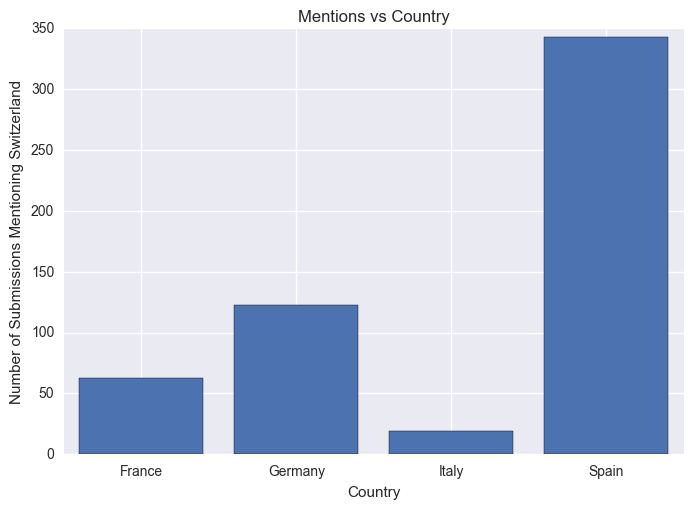

In [55]:
df_country_mention_swiss = swiss_specific_df.groupby('subreddit_country')[['num_comments','title','created_utc']].size()
ax = plt.bar(range(len(df_country_mention_swiss.index)),df_country_mention_swiss.values,align='center')
plt.xlabel('Country')
plt.ylabel('Number of Submissions Mentioning Switzerland')
plt.xticks(range(len(df_country_mention_swiss.index)),df_country_mention_swiss.index)
plt.title('Mentions vs Country')

### Most discussed submissions over time

In [42]:
month_dict = ['Jan','Feb','March','April','May','June','July','August','Sept','Oct','Nov','Dec']
swiss_specific_df['month_year'] = [month_dict[swiss_specific_df.dates.iloc[i].month-1] + '_' 
                                   + str(swiss_specific_df.dates.iloc[i].year) for i in range(len(swiss_specific_df))]

In [64]:
df_most_popular_per_month = swiss_specific_df.groupby('month_year')[['num_comments','title','created_utc','subreddit','subreddit_country']].max()

(-0.40000000000000002, 20.400000000000002, 0.0, 512.0)

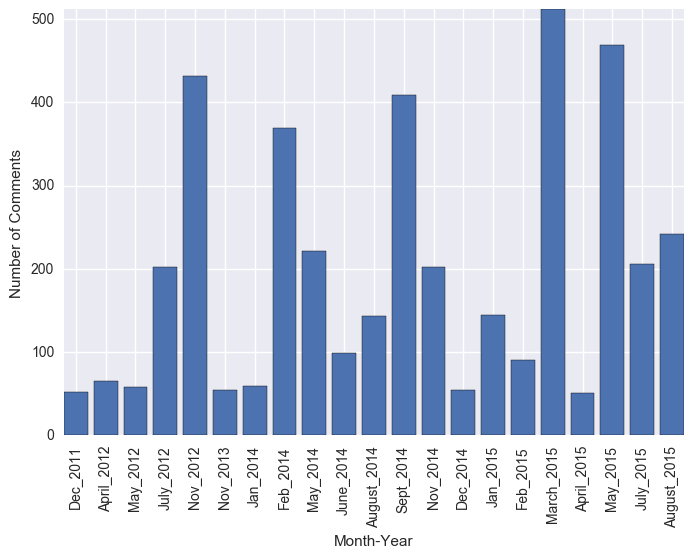

In [65]:


# indx = df_most_popular_per_month.filter(lambda x: x['num_comments'] > threshold)
df_sorted = df_most_popular_per_month.query('num_comments>50').sort_values('created_utc')
plt.bar(range(len(df_sorted.index)),df_sorted.num_comments,align='center')
plt.xlabel('Month-Year')
plt.ylabel('Number of Comments')
plt.xticks(range(len(df_sorted.index)),df_sorted.index, rotation = 'vertical')
plt.axis('tight')

In [79]:
tmp = df_most_popular_per_month.sort_values('num_comments',ascending=False)
for i in range(0,5):
    print('Submission: '+ tmp.iloc[i]['title'])
    print('Country: '+ tmp.iloc[i]['subreddit'])
    print('Month-Year: ' + tmp.index[i])

Submission: taxes if worked in Switzerland but lived in Germany
Country: germany
Month-Year: March_2015
Submission: «Die Deutschen» fühlen sich in der Schweiz nicht willkommen – wundert sich die grösste Schweizer Zeitung «20 Minuten». Wie es dazu kommen konnte, erzählen 11 Schlagzeilen – aus «20 Minuten»
Country: italy
Month-Year: May_2015
Submission: West raises pressure on neutral Switzerland over Iran
Country: rance
Month-Year: Nov_2012
Submission: [NSFW] The difference between Swiss and American news media
Country: italy
Month-Year: Sept_2014
Submission: Yesterday Switzerland voted 'yes' to cap EU immigration. Here's a picture of the Swiss national football team without immigrants [x-post /r/soccer]
Country: europe
Month-Year: Feb_2014
